##Are there correlations between family planning access and maternal 
healthcare- seeking behavior, such as antenatal care attendance and 
skilled birth attendance?  

In [2]:
import pandas as pd
import plotly.express as px
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm



# Load the CSV files into DataFrames
df1 = pd.read_csv('Output/Antenatal_care.csv')
df2 = pd.read_csv('Output/family_planning_cleaned.csv')
df3 = pd.read_csv('Output/skilled_personnel.csv')

In [3]:
# Display the first few rows of each DataFrame 
print("Antenatal Care Data:")
df1.head()


Antenatal Care Data:


,IndicatorCode,Indicator,ParentLocation,Location,Age-group,Anatal_care%,FactComments,Starting_year,Ending_year,Period_Range
0,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,NaN,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023
1,WHS4_154,Antenatal care coverage - at least four visits...,Africa,Senegal,NaN,68.4,DHS 2023 (DHS Continuous) Key indicators.,2021,2023,2021-2023
2,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Tunisia,NaN,79,MICS 2023 (snaphots),2021,2023,2021-2023
3,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Jordan,NaN,93.1,PFHS 2023 (key indicators).,2021,2023,2021-2023
4,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Yemen,NaN,32.4,MICS 2022-2023.,2020,2023,2021-2023


In [4]:
print("\nFamily Planning Data:")
df2.head()


Family Planning Data:


,IndicatorCode,Indicator,Patents_Continent_Code,ParentLocation_Continent,Country_Code,Country,Gender,Age_Group,Planning_Value_Rate,FactComments,Language_Code,Starting_Year,Year_Ending,Year_Group,Year_Period_Range
0,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,UGA,Uganda,Female,15-49 years,65.5,The global indicator represents all women of r...,EN,2021,2021,2021-2021,2021-2023
1,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,NER,Niger,Female,15-49 years,36.9,Niger 2021 PMA Survey Phase 1,EN,2020,2021,2020-2021,2021-2023
2,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,BFA,Burkina Faso,Female,15-49 years,58.2,Burkina Faso 2021 PMA Survey Phase 2,EN,2020,2021,2020-2021,2021-2023
3,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,WPR,Western Pacific,VNM,Viet Nam,Female,15-49 years,72.1,The global indicator represents all women of r...,EN,2020,2021,2020-2021,2021-2023
4,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,CIV,Cote d'Ivoire,Female,15-49 years,46.1,Côte d'Ivoire 2020 PMA Survey Phase 1,EN,2020,2020,2020-2020,2018-2020


In [5]:

df2.rename(columns={'Year_Period_Range': 'Period_Range', 'ParentLocation_Continent': 'ParentLocation'}, inplace=True)

print(df2.columns)


Index(['IndicatorCode', 'Indicator', 'Patents_Continent_Code',
       'ParentLocation', 'Country_Code', 'Country', 'Gender', 'Age_Group',
       'Planning_Value_Rate', 'FactComments', 'Language_Code', 'Starting_Year',
       'Year_Ending', 'Year_Group', 'Period_Range'],
      dtype='object')


In [6]:
print("\nFamily Planning Data:")
df2.head()


Family Planning Data:


,IndicatorCode,Indicator,Patents_Continent_Code,ParentLocation,Country_Code,Country,Gender,Age_Group,Planning_Value_Rate,FactComments,Language_Code,Starting_Year,Year_Ending,Year_Group,Period_Range
0,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,UGA,Uganda,Female,15-49 years,65.5,The global indicator represents all women of r...,EN,2021,2021,2021-2021,2021-2023
1,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,NER,Niger,Female,15-49 years,36.9,Niger 2021 PMA Survey Phase 1,EN,2020,2021,2020-2021,2021-2023
2,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,BFA,Burkina Faso,Female,15-49 years,58.2,Burkina Faso 2021 PMA Survey Phase 2,EN,2020,2021,2020-2021,2021-2023
3,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,WPR,Western Pacific,VNM,Viet Nam,Female,15-49 years,72.1,The global indicator represents all women of r...,EN,2020,2021,2020-2021,2021-2023
4,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,CIV,Cote d'Ivoire,Female,15-49 years,46.1,Côte d'Ivoire 2020 PMA Survey Phase 1,EN,2020,2020,2020-2020,2018-2020


In [7]:
print("\nSkilled Personnel:")
df3.head()


Skilled Personnel:


,IndicatorCode,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period type,skilled_personnel%,FactComments,DateModified,Starting_Year,Year_Ending,Period_Range
0,MDG_0000000025,SEAR,South-East Asia,IDN,Indonesia,Year,95.7,SUSENAS 2023 as part of Welfare Statistics 2023,2024-04-26 00:00:00,2023,2023,2021-2023
1,MDG_0000000025,EUR,Europe,FRA,France,Year,97.6,Institutional Birth (IB): includes all deliver...,2024-04-26 00:00:00,2023,2023,2021-2023
2,MDG_0000000025,EMR,Eastern Mediterranean,SAU,Saudi Arabia,Year,99.8,Women Health and Reproductive Survey,2024-04-26 00:00:00,2023,2023,2021-2023
3,MDG_0000000025,EMR,Eastern Mediterranean,JOR,Jordan,Year,99.9,Department of Statistics (DoS) [Jordan] and IC...,2024-04-26 00:00:00,2023,2023,2021-2023
4,MDG_0000000025,EMR,Eastern Mediterranean,YEM,Yemen,Year,60.9,Central Statistical Organization (CSO) and Uni...,2024-04-26 00:00:00,2022,2023,2021-2023


In [8]:
# Merge df1 and df2 on 'ParentLocation'
merged_df = pd.merge(df1, df2, on='ParentLocation', how='inner')

# Display the merged DataFrameprint("\nMerged DataFrame:")
merged_df.head()

,IndicatorCode_x,Indicator_x,ParentLocation,Location,Age-group,Anatal_care%,FactComments_x,Starting_year,Ending_year,Period_Range_x,...,Country,Gender,Age_Group,Planning_Value_Rate,FactComments_y,Language_Code,Starting_Year,Year_Ending,Year_Group,Period_Range_y
0,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,NaN,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,...,"occupied Palestinian territory, including east...",Female,15-49 years,61.0,The global indicator represents all women of r...,EN,2019,2020,2019-2020,2018-2020
1,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,NaN,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,...,Somalia,Female,15-49 years,2.1,The global indicator represents all women of r...,EN,2018,2019,2018-2019,2018-2020
2,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,NaN,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,...,Iraq,Female,15-49 years,53.8,The global indicator represents all women of r...,EN,2018,2018,2018-2018,2018-2020
3,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,NaN,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,...,Tunisia,Female,15-49 years,62.7,The global indicator represents all women of r...,EN,2018,2018,2018-2018,2018-2020
4,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,NaN,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,...,Morocco,Female,15-49 years,72.0,The global indicator represents all women of r...,EN,2018,2018,2018-2018,2018-2020


In [9]:
# Merge merged_df and df3 on 'ParentLocation'
final_merged_df= pd.merge(merged_df , df3, on='ParentLocation', how='inner')

final_merged_df.head()

,IndicatorCode_x,Indicator_x,ParentLocation,Location_x,Age-group,Anatal_care%,FactComments_x,Starting_year,Ending_year,Period_Range_x,...,ParentLocationCode,SpatialDimValueCode,Location_y,Period type,skilled_personnel%,FactComments,DateModified,Starting_Year_y,Year_Ending_y,Period_Range
0,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,NaN,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,...,EMR,SAU,Saudi Arabia,Year,99.8,Women Health and Reproductive Survey,2024-04-26 00:00:00,2023,2023,2021-2023
1,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,NaN,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,...,EMR,JOR,Jordan,Year,99.9,Department of Statistics (DoS) [Jordan] and IC...,2024-04-26 00:00:00,2023,2023,2021-2023
2,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,NaN,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,...,EMR,YEM,Yemen,Year,60.9,Central Statistical Organization (CSO) and Uni...,2024-04-26 00:00:00,2022,2023,2021-2023
3,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,NaN,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,...,EMR,AFG,Afghanistan,Year,67.5,UNICEF. 2023. Afghanistan Multiple Indicator C...,2024-04-26 00:00:00,2022,2023,2021-2023
4,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,NaN,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,...,EMR,IRN,Iran (Islamic Republic of),Year,99.0,Health Indicators in the Islamic Republic of I...,2024-04-26 00:00:00,2022,2023,2021-2023


In [10]:
# Drop columns with NaN values
final_merged_df.dropna(axis=1, inplace=True)

In [11]:
print("\nMerged DataFrame:")
final_merged_df.head()


Merged DataFrame:


,IndicatorCode_x,Indicator_x,ParentLocation,Location_x,Anatal_care%,FactComments_x,Starting_year,Ending_year,Period_Range_x,IndicatorCode_y,...,IndicatorCode,ParentLocationCode,SpatialDimValueCode,Location_y,Period type,skilled_personnel%,DateModified,Starting_Year_y,Year_Ending_y,Period_Range
0,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,MDG_0000000025,EMR,SAU,Saudi Arabia,Year,99.8,2024-04-26 00:00:00,2023,2023,2021-2023
1,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,MDG_0000000025,EMR,JOR,Jordan,Year,99.9,2024-04-26 00:00:00,2023,2023,2021-2023
2,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,MDG_0000000025,EMR,YEM,Yemen,Year,60.9,2024-04-26 00:00:00,2022,2023,2021-2023
3,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,MDG_0000000025,EMR,AFG,Afghanistan,Year,67.5,2024-04-26 00:00:00,2022,2023,2021-2023
4,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,MDG_0000000025,EMR,IRN,Iran (Islamic Republic of),Year,99.0,2024-04-26 00:00:00,2022,2023,2021-2023


In [22]:
final_merged_df.tail()

,IndicatorCode_x,Indicator_x,ParentLocation,Location_x,Anatal_care%,FactComments_x,Starting_year,Ending_year,Period_Range_x,IndicatorCode_y,...,IndicatorCode,ParentLocationCode,SpatialDimValueCode,Location_y,Period type,skilled_personnel%,DateModified,Starting_Year_y,Year_Ending_y,Period_Range
1988314,WHS4_154,Antenatal care coverage - at least four visits...,South-East Asia,Sri Lanka,92.5,DHS 2006-2007.,2001,2007,2006-2008,SDGFPALL,...,MDG_0000000025,SEAR,IND,India,Year,42.5,2024-04-26 00:00:00,2000,2000,Out of Range
1988315,WHS4_154,Antenatal care coverage - at least four visits...,South-East Asia,Sri Lanka,92.5,DHS 2006-2007.,2001,2007,2006-2008,SDGFPALL,...,MDG_0000000025,SEAR,LKA,Sri Lanka,Year,96.0,2024-04-26 00:00:00,2000,2000,Out of Range
1988316,WHS4_154,Antenatal care coverage - at least four visits...,South-East Asia,Sri Lanka,92.5,DHS 2006-2007.,2001,2007,2006-2008,SDGFPALL,...,MDG_0000000025,SEAR,PRK,Democratic People's Republic of Korea,Year,96.7,2024-04-26 00:00:00,2000,2000,Out of Range
1988317,WHS4_154,Antenatal care coverage - at least four visits...,South-East Asia,Sri Lanka,92.5,DHS 2006-2007.,2001,2007,2006-2008,SDGFPALL,...,MDG_0000000025,SEAR,THA,Thailand,Year,99.3,2024-04-26 00:00:00,2000,2000,Out of Range
1988318,WHS4_154,Antenatal care coverage - at least four visits...,South-East Asia,Sri Lanka,92.5,DHS 2006-2007.,2001,2007,2006-2008,SDGFPALL,...,MDG_0000000025,SEAR,BGD,Bangladesh,Year,12.1,2024-04-26 00:00:00,1999,2000,Out of Range


In [12]:
print(final_merged_df.columns)

Index(['IndicatorCode_x', 'Indicator_x', 'ParentLocation', 'Location_x',
       'Anatal_care%', 'FactComments_x', 'Starting_year', 'Ending_year',
       'Period_Range_x', 'IndicatorCode_y', 'Indicator_y',
       'Patents_Continent_Code', 'Country_Code', 'Country', 'Gender',
       'Age_Group', 'Planning_Value_Rate', 'FactComments_y', 'Language_Code',
       'Starting_Year_x', 'Year_Ending_x', 'Year_Group', 'Period_Range_y',
       'IndicatorCode', 'ParentLocationCode', 'SpatialDimValueCode',
       'Location_y', 'Period type', 'skilled_personnel%', 'DateModified',
       'Starting_Year_y', 'Year_Ending_y', 'Period_Range'],
      dtype='object')


In [13]:
# Extracting specific columns
subset_df = final_merged_df[['ParentLocation','skilled_personnel%','Anatal_care%', 'Planning_Value_Rate', 'Period_Range_x',]]


In [23]:
subset_df

,ParentLocation,skilled_personnel%,Anatal_care%,Planning_Value_Rate,Period_Range_x
0,Eastern Mediterranean,99.8,88.8,61.0,2021-2023
1,Eastern Mediterranean,99.9,88.8,61.0,2021-2023
2,Eastern Mediterranean,60.9,88.8,61.0,2021-2023
3,Eastern Mediterranean,67.5,88.8,61.0,2021-2023
4,Eastern Mediterranean,99.0,88.8,61.0,2021-2023
...,...,...,...,...,...
1988314,South-East Asia,42.5,92.5,84.6,2006-2008
1988315,South-East Asia,96.0,92.5,84.6,2006-2008
1988316,South-East Asia,96.7,92.5,84.6,2006-2008
1988317,South-East Asia,99.3,92.5,84.6,2006-2008


In [24]:
df = pd.DataFrame(subset_df)

In [25]:
# Ensure that all percentage columns are numeric
df['skilled_personnel%'] = pd.to_numeric(df['skilled_personnel%'], errors='coerce')
df['Anatal_care%'] = pd.to_numeric(df['Anatal_care%'], errors='coerce')
df['Planning_Value_Rate'] = pd.to_numeric(df['Planning_Value_Rate'], errors='coerce')

# Group by 'ParentLocation' and calculate the mean for each percentage column
grouped_df_mean = df.groupby('ParentLocation').agg({
    'skilled_personnel%': 'mean',
    'Anatal_care%': 'mean',
    'Planning_Value_Rate': 'mean',
    'Period_Range_x': 'first'  
})

print("\nGrouped DataFrame by 'ParentLocation' (mean):")
grouped_df_mean



Grouped DataFrame by 'ParentLocation' (mean):


,skilled_personnel%,Anatal_care%,Planning_Value_Rate,Period_Range_x
ParentLocation,,,,
Africa,68.099313,62.326531,50.541304,2021-2023
Americas,94.357270,86.622857,72.736000,2021-2023
Eastern Mediterranean,87.081481,70.566667,50.250000,2021-2023
Europe,98.651609,90.111211,57.339130,2021-2023
South-East Asia,70.286813,76.945455,71.116667,2021-2023
Western Pacific,93.851903,78.666667,56.946667,2021-2023


In [28]:
# Ensure that all percentage columns are numeric
df['skilled_personnel%'] = pd.to_numeric(df['skilled_personnel%'], errors='coerce')
df['Anatal_care%'] = pd.to_numeric(df['Anatal_care%'], errors='coerce')
df['Planning_Value_Rate'] = pd.to_numeric(df['Planning_Value_Rate'], errors='coerce')

# Group by 'ParentLocation' and calculate the mean for each percentage column
# Keep all unique period ranges in a list
grouped_df_mean = df.groupby('ParentLocation').agg({
    'skilled_personnel%': 'mean',
    'Anatal_care%': 'mean',
    'Planning_Value_Rate': 'mean',
    'Period_Range_x': lambda x: list(x.unique())  # Keep unique period ranges in a list
})

print("\nGrouped DataFrame by 'ParentLocation' (mean):")
grouped_df_mean



Grouped DataFrame by 'ParentLocation' (mean):


,skilled_personnel%,Anatal_care%,Planning_Value_Rate,Period_Range_x
ParentLocation,,,,
Africa,68.099313,62.326531,50.541304,"[2021-2023, 2018-2020, 2015-2017, 2012-2014, 2..."
Americas,94.357270,86.622857,72.736000,"[2021-2023, 2018-2020, 2015-2017, 2009-2011, 2..."
Eastern Mediterranean,87.081481,70.566667,50.250000,"[2021-2023, 2018-2020, 2015-2017, 2012-2014, 2..."
Europe,98.651609,90.111211,57.339130,"[2021-2023, 2018-2020, 2015-2017, 2012-2014, 2..."
South-East Asia,70.286813,76.945455,71.116667,"[2021-2023, 2015-2017, 2006-2008]"
Western Pacific,93.851903,78.666667,56.946667,"[2021-2023, 2018-2020, 2015-2017, 2012-2014, 2..."


In [29]:
# Ensure that all percentage columns are numeric
df['skilled_personnel%'] = pd.to_numeric(df['skilled_personnel%'], errors='coerce')
df['Anatal_care%'] = pd.to_numeric(df['Anatal_care%'], errors='coerce')
df['Planning_Value_Rate'] = pd.to_numeric(df['Planning_Value_Rate'], errors='coerce')

# Group by 'ParentLocation' and calculate the mean for each percentage column
grouped_df_mean = df.groupby('ParentLocation').agg({
    'skilled_personnel%': 'mean',
    'Anatal_care%': 'mean',
    'Planning_Value_Rate': 'mean',
    'Period_Range_x': 'first'  
})

print("\nGrouped DataFrame by 'ParentLocation' (mean):")
grouped_df_mean


Grouped DataFrame by 'ParentLocation' (mean):


,skilled_personnel%,Anatal_care%,Planning_Value_Rate,Period_Range_x
ParentLocation,,,,
Africa,68.099313,62.326531,50.541304,2021-2023
Americas,94.357270,86.622857,72.736000,2021-2023
Eastern Mediterranean,87.081481,70.566667,50.250000,2021-2023
Europe,98.651609,90.111211,57.339130,2021-2023
South-East Asia,70.286813,76.945455,71.116667,2021-2023
Western Pacific,93.851903,78.666667,56.946667,2021-2023


In [31]:
print(grouped_df_mean.columns)



Index(['skilled_personnel%', 'Anatal_care%', 'Planning_Value_Rate',
       'Period_Range_x'],
      dtype='object')


In [59]:
grouped_df_mean = grouped_df_mean.reset_index()


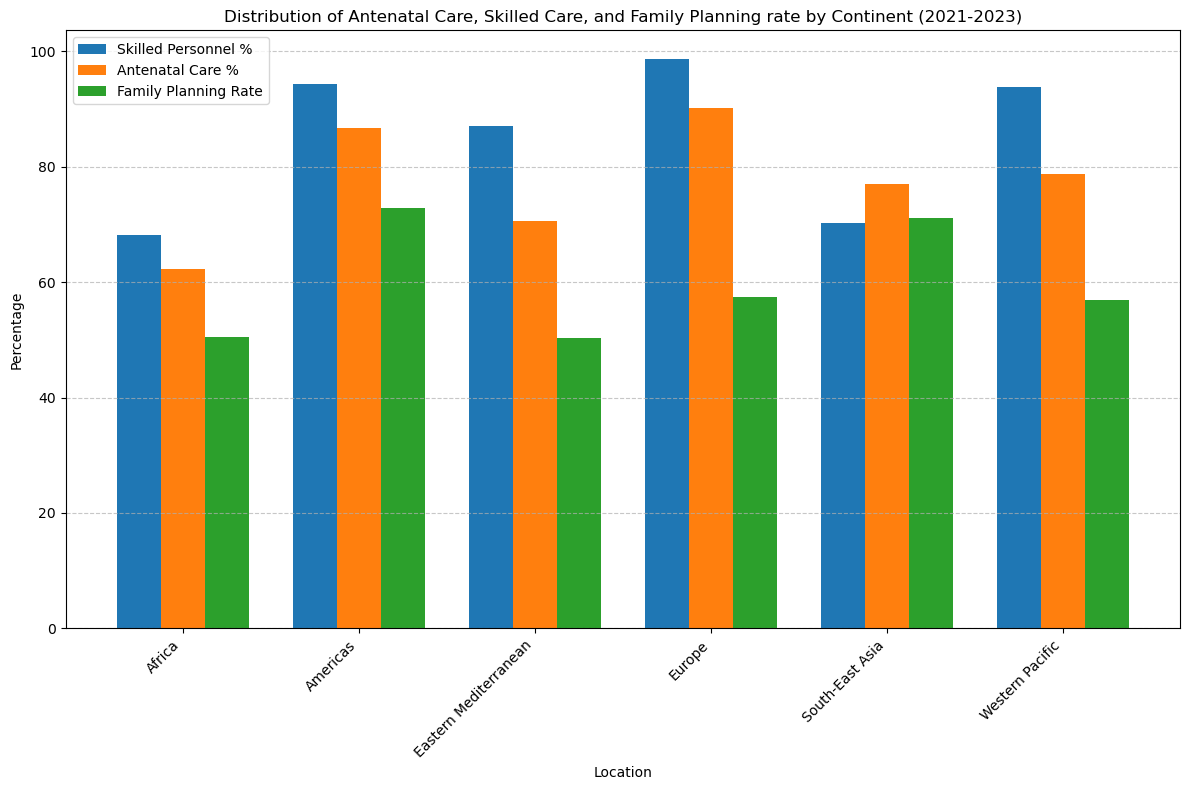

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.25
indices = np.arange(len(grouped_df_mean))

p1 = ax.bar(indices - bar_width, grouped_df_mean['skilled_personnel%'], bar_width, label='Skilled Personnel %')
p2 = ax.bar(indices, grouped_df_mean['Anatal_care%'], bar_width, label='Antenatal Care %')
p3 = ax.bar(indices + bar_width, grouped_df_mean['Planning_Value_Rate'], bar_width, label='Family Planning Rate')

ax.set_xlabel('Location')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of Antenatal Care, Skilled Care, and Family Planning rate by Continent (2021-2023)')
ax.set_xticks(indices)
ax.set_xticklabels(grouped_df_mean['ParentLocation'], rotation=45, ha='right')
ax.legend()

# Adding grid lines
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

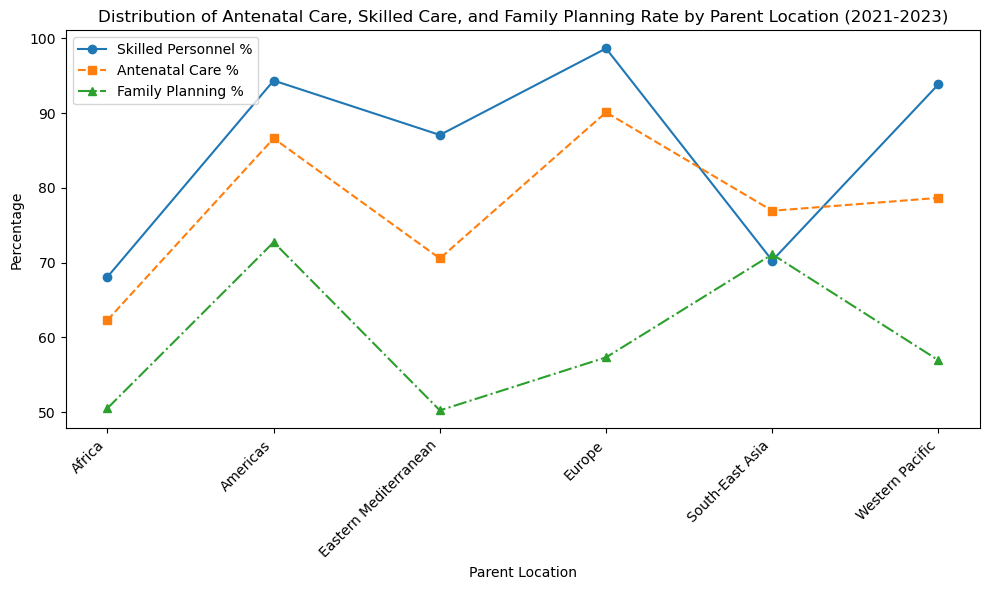

In [64]:
# Plotting the line graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting lines for each variable
ax.plot(grouped_df_mean['ParentLocation'], grouped_df_mean['skilled_personnel%'], marker='o', linestyle='-', label='Skilled Personnel %')
ax.plot(grouped_df_mean['ParentLocation'], grouped_df_mean['Anatal_care%'], marker='s', linestyle='--', label='Antenatal Care %')
ax.plot(grouped_df_mean['ParentLocation'], grouped_df_mean['Planning_Value_Rate'], marker='^', linestyle='-.', label='Family Planning %')

# Adding labels and title
ax.set_xlabel('Parent Location')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of Antenatal Care, Skilled Care, and Family Planning Rate by Parent Location (2021-2023)')
ax.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()